# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

### Importando as bibliotecas

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Carregando o DataFrame

In [126]:
credito=pd.read_csv('demo01.csv')
credito.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


### Analisando as variáveis

In [127]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

**Observação 1:** Podemos perceber que não há nenhum missing nesse dataframe. 

In [128]:
credito.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

**Observação2**: Podemos ver que a maioria das variáveis são do tipo string, mas representam valores booleanos (sexo,posse_de_veiculo,posse_de_imovel) e podem ser substituidas por 0 ou 1. Já outras variáveis são categóricas (tipo_renda, educacao, estado_civil, tipo_residencia) têm mais de duas categorias e precisarão ser tratadas.  Já a nossa **variável resposta** é do tipo booleana.                                                   

### Dropando dados duplicados

In [129]:
credito.drop_duplicates()
credito=credito.drop_duplicates()
credito.shape

(6770, 16)

**Observação 3** : Observamos que a quantidade de linhas caiu para menos da metade. 

### Reordenando o Index

In [130]:
credito.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
16644,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16649,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


In [131]:
credito.reset_index(drop=True, inplace=True)
credito.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
6765,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
6766,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
6767,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
6768,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
6769,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


### Distribuição da variável resposta (mau)

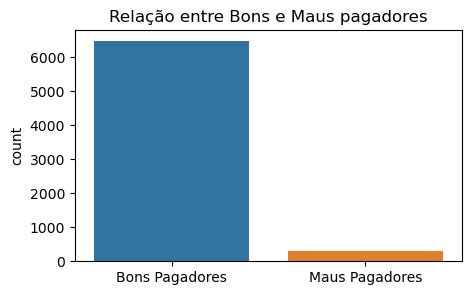

In [132]:
fig = plt.figure(figsize=(5, 3))
ax1 = fig.add_subplot(1, 1, 1)
ax1=sns.countplot(x='mau', data=credito)
ax1.set_title('Relação entre Bons e Maus pagadores')
ax1.set_xlabel('')
ax1.set_xticklabels(['Bons Pagadores', 'Maus Pagadores'])

plt.show()

In [133]:
credito['mau'].value_counts()

False    6472
True      298
Name: mau, dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

**1)**  Um dicionário foi criado, onde a coluna 'Variável' corresponde ao cabeçalho do dataframe original e a coluna 'Tipo' corresponde ao tipo de cada variável do Dataframe original. 
Após isso foi utilizado o método reset_index para substituir os nomes dos índices (o mesmo nome da coluna Variável) para apenas uma numeração, evitando assim informação dupla. 

In [134]:
classificacao_das_variaveis = pd.DataFrame({'Variável': credito.columns, 'Tipo': credito.dtypes})
classificacao_das_variaveis.reset_index(drop=True)


,Variável,Tipo
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


**2)** Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.

In [135]:
lista=[]
for variavel in classificacao_das_variaveis['Variável']:
    numero_de_categorias=credito[variavel].nunique()
    lista.append(numero_de_categorias)
classificacao_das_variaveis['qtd_categorias']=lista
classificacao_das_variaveis

,Variável,Tipo,qtd_categorias
sexo,sexo,object,2
posse_de_veiculo,posse_de_veiculo,object,2
posse_de_imovel,posse_de_imovel,object,2
qtd_filhos,qtd_filhos,int64,8
tipo_renda,tipo_renda,object,5
educacao,educacao,object,5
estado_civil,estado_civil,object,5
tipo_residencia,tipo_residencia,object,6
idade,idade,float64,5298
tempo_emprego,tempo_emprego,float64,3005


### Utilização do Mapping

**Para as variáveis sexo, posse_de_veiculo e posse_de_imóvel será utilizado o método map, pois essas variáveis apresentam apenas duas categorias que podem simplesmente serem representadas por 0 e 1**

In [136]:
credito.sexo = credito.sexo.map({'M': 1, 'F':0})
credito.posse_de_veiculo = credito.posse_de_veiculo.map({'Y': 1, 'N':0})
credito.posse_de_imovel = credito.posse_de_imovel.map({'Y': 1, 'N':0})

In [137]:
credito.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,1,1,1,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,0,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,1,1,1,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
3,0,1,0,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
4,0,0,1,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [138]:
credito = pd.get_dummies(credito, columns=['tipo_renda','educacao','estado_civil','tipo_residencia'], drop_first=True)
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

**Observação importante**: Por algum motivo as variáveis ficaram com uma categoria a menos

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [139]:
freq1=pd.crosstab(credito['possui_email'], credito['posse_de_veiculo'])
display(freq1)
freq_pct1=freq1.div(freq1.sum(axis = 1), axis = 0)
display(freq_pct1)

posse_de_veiculo,0,1
possui_email,,
0,3878,2327
1,333,232


posse_de_veiculo,0,1
possui_email,,
0,0.624980,0.375020
1,0.589381,0.410619


In [140]:
freq2=pd.crosstab(credito['possui_email'], credito['mau'])
display(freq2)
freq_pct2=freq2.div(freq2.sum(axis = 1), axis = 0)
display(freq_pct2)

mau,False,True
possui_email,,
0,5927,278
1,545,20


mau,False,True
possui_email,,
0,0.955197,0.044803
1,0.964602,0.035398


In [141]:
freq3=pd.crosstab(credito['posse_de_veiculo'], credito['mau'])
display(freq3)
freq_pct3=freq3.div(freq3.sum(axis = 1), axis = 0)
display(freq_pct3)

mau,False,True
posse_de_veiculo,,
0,4021,190
1,2451,108


mau,False,True
posse_de_veiculo,,
0,0.954880,0.045120
1,0.957796,0.042204


**Análise**

A tabela cruzada nos mostra que os valores de mau é maior para as pessoas que não possuem email do que para as pessoas que possuem email. Isso significa que ter ou não um email faz diferença na probabilidade de ser um mau pagador.

Por outro lado, a tabela cruzada nos mostra que os valores de mau é quase igual para as pessoas que possuem ou não veículo. Isso significa que ter ou não um veículo não faz muita diferença na probabilidade de ser um mau pagador.

Portanto, a variável possui_email é mais poderosa para prever a probabilidade de mau = 1 do que a variável posse_de_veiculo

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [142]:
credito.to_csv('credito_novo.csv')